In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
#2. Load and Preprocess the Dataset
# The mnist dataset can be loaded directly from Keras, which simplifies the process.
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to fit the model (batch_size, height, width, channels)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# Normalize the pixel values to the range 0-1
X_train /= 255.0
X_test /= 255.0

# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


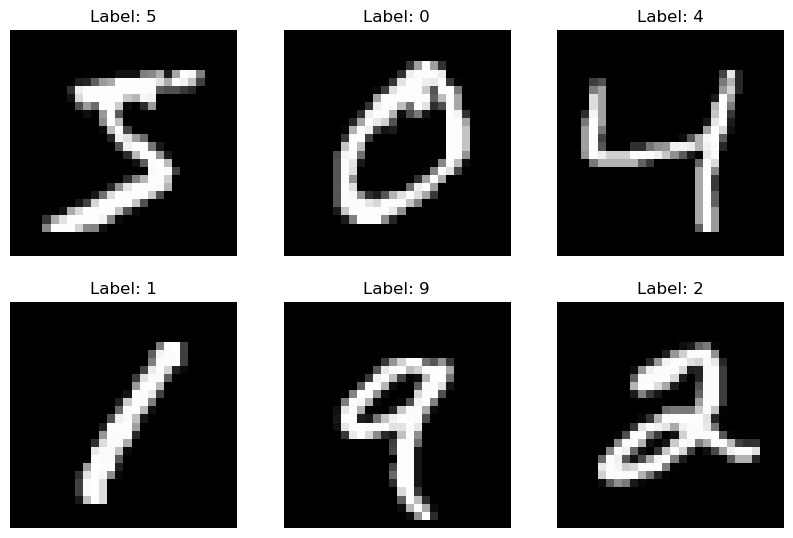

In [14]:
#3. Visualize Some Examples from the Dataset
# Visualizing the data can help us understand the data structure.

# Display the first 6 images in the training dataset
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
plt.show()


In [4]:
# 4. Build the CNN Model
# CNNs are well-suited for image classification tasks because they capture spatial hierarchies in images effectively.
# Define the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization to prevent overfitting
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes (digits 0-9)


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [5]:
# 5. Compile the Model
# Before training, we need to compile the model by specifying the optimizer, loss function, and metrics.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# 6. Train the Model
# We can now train the CNN model on the MNIST dataset. The validation split will help us monitor how the model performs on unseen data during training.
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7731 - loss: 0.7071 - val_accuracy: 0.9766 - val_loss: 0.0770
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9646 - loss: 0.1165 - val_accuracy: 0.9812 - val_loss: 0.0603
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9768 - loss: 0.0787 - val_accuracy: 0.9852 - val_loss: 0.0495
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9818 - loss: 0.0631 - val_accuracy: 0.9873 - val_loss: 0.0421
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9828 - loss: 0.0554 - val_accuracy: 0.9855 - val_loss: 0.0519
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9845 - loss: 0.0495 - val_accuracy: 0.9892 - val_loss: 0.0381
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9901 - val_loss: 0.0378
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9895 - loss: 0.0374 - val_ac

In [7]:
# 7. Evaluate the Model
# Evaluate the model on the test dataset to see how well it generalizes to new data.
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9910


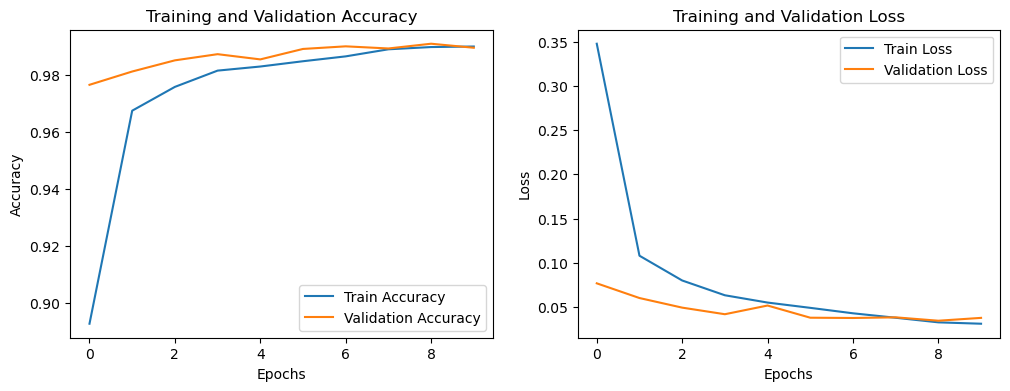

In [8]:
# 8. Visualize Training Performance
# Plotting accuracy and loss over epochs helps us understand the training dynamics.
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


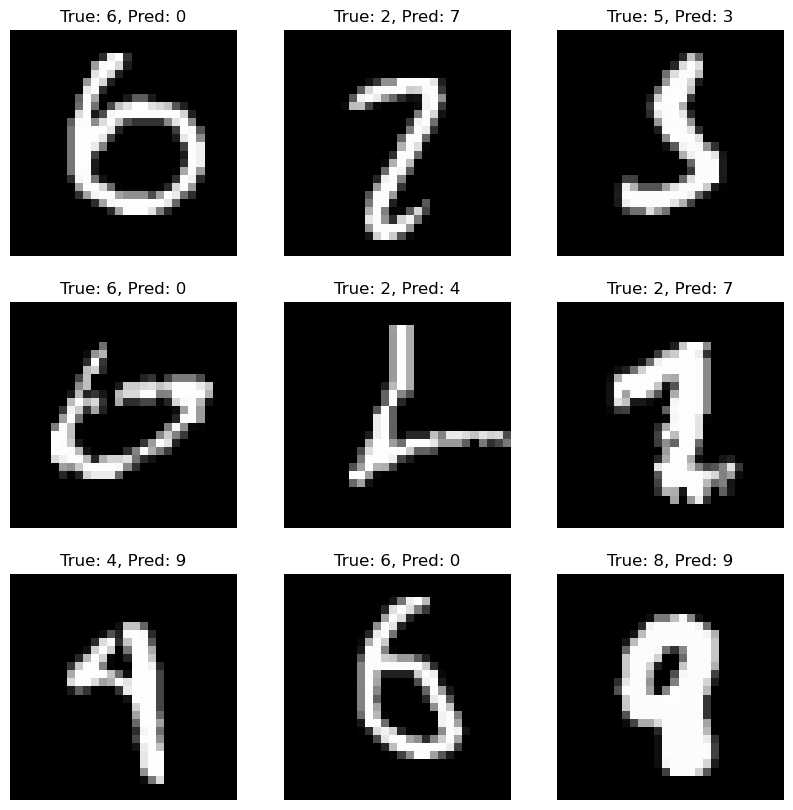

In [9]:
# 9. Make Predictions and Analyze Misclassifications

import numpy as np

# Make predictions on the test set
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Identify misclassified examples
misclassified_indices = np.where(y_pred != y_true)[0]

# Display a few misclassified images
plt.figure(figsize=(10,10))
for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.show()


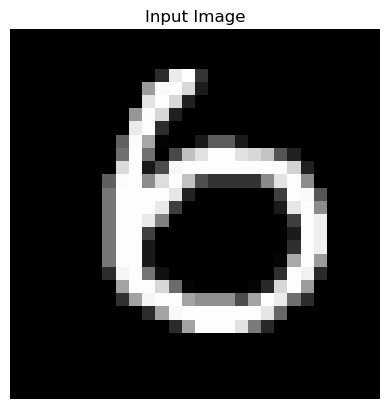

In [16]:
# 2. Make a Prediction
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image, resize if necessary (should be 28x28 pixels), and convert to grayscale
img_path = "digit.png"  # Path to your image
img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")

# Display the image
plt.imshow(img, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

# Convert the image to an array and preprocess it
img_array = image.img_to_array(img)
img_array = img_array.reshape(1, 28, 28, 1)  # Add batch dimension
img_array = img_array.astype('float32') / 255.0  # Normalize the image


In [17]:
# Predict the class of the image
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Predicted Digit: 0


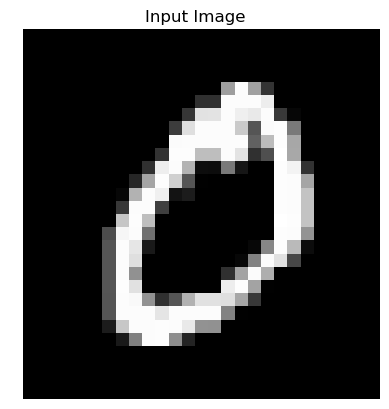

In [18]:
# 2. Make a Prediction
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load the image, resize if necessary (should be 28x28 pixels), and convert to grayscale
img_path = "digit1.png"  # Path to your image
img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")

# Display the image
plt.imshow(img, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

# Convert the image to an array and preprocess it
img_array = image.img_to_array(img)
img_array = img_array.reshape(1, 28, 28, 1)  # Add batch dimension
img_array = img_array.astype('float32') / 255.0  # Normalize the image


In [19]:
# Predict the class of the image
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Digit: 0
